In [35]:
# Google API 
from googleapiclient.discovery import build

# Data Manipulation
import pandas as pd
from dateutil import parser
from IPython.display import display,JSON

# data visualization 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# NLP
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yasaswiavula/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/yasaswiavula/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# https://developers.google.com/youtube/v3/docs
api_key = "your_api"

In [3]:
channels = ["UC_mYaQAE6-71rjSN6CeCA-g","UC4xKdmAXFh4ACyhpiQ_3qBw","UC8butISFwT-Wl7EV0hUK0BQ","UCNU_lfiiWBdtULKOw6X0Dig","UCrqAGUPPMOdo0jfQ6grikZw","UCkw4JCwteGrDHIsyIIKo4tQ","UCChmJrVa8kDg05JfCmxpLRw","UCoOae5nYA7VqaXzerajD0lg","UC1RauiosDyz3K16X1wkaeiA","UCWIzrKzN4KY6BPU8hsk880Q"]

In [5]:
# My Subscribed Channels 147 (future scope - analyze my favorite genres)
channel_names1 = ["BRIGHTSIDEOFFICIAL","NeetCode","TechLead","JaySharon","KarissaEats","mastering_snowflake","amriceleste","nikitagupta-TechRecruiter","KomalPal","sadhguru","EverythingDolls","peternugget","itskatesteinberg","kimliztoo","heyitshoneysuckle","BBCNews","cookingwithkian","anatolii-ulitovskyi","YAFTV","TEDx","animationmentor","TED","freecodecamp","EvanCarmichael","baochitravel","Omeleto","findingfiona","Motivation2Study","Tech69YT","Ashleysyoutube","TEDEd","MrBean","DrewTalbert","zeemusiccompany","bobross_thejoyofpainting","PudiVlogs","darbarfestival","rootedinspice","rowanatkinson","jomaoppa","KenJee_ds","OxfordUnion","RProgramming101","sharmaleadership","EnglishwithLucy","HeatherRooney","bhagavadgita4life","formalistictalks4385","ApertureThinking","followingmahesh"]
channel_names2 = ["brunomars","tusharlall02","ColtSteeleCode","SayaniChakraborty","shawnmendes","KennySebastian","DeltaStep","engvidRonnie","codingfungrb9918","CybersecYT","LucasKingPiano","DarshilParmar","SakhiDiaries","ParthVijayvergiya","TheViralFever","newslaundry","sonymusicindiaVEVO","ProZD","LearnEnglishWithTVSeries","LearnGermanOriginal","krishnaik06","kurzgesagt","aliabdaal","ITkFunde","dualipa","redditstudios4543","ammaammayimuchatlu2474","khalid","vewn","UniverseInsideYou","GoExperimental","twosetviolin","jubilee","Chitraastra","eminem","LifeatGoogle","VoxGuru","makeupbymonicaa","DannyDuncanShorts","OKTestedbyscoopwhoop","GreatBigStory","bbcearth","BlazedAndGlazed","301Diaries","Einzelganger","selenak4565","AnnaTatlin","CelebrityObserver","morgandrinkscoffee","escaping.ordinary"]
channel_names3 = ["LEMMiNO","absolutelydanny","COLLEGELIFECHANNEL777","abdul_bari","YogiBabaOG","VitaminStree","kurzgesagt","InsiderBusiness","PursuitofWonder","Zeth","EnglishClass101","MusicforBodyandSpirit","edurekaIN","ashishchanchlanivines","justinflom","HybridCalisthenics","FamilyofNomads","SalaryTransparentStreet","kallmekris","ShubaMusic","TealSwanOfficial","pleasantpeasantmedia","VIVACIOUSHONEY","SideserfCakes","Alanwalkermusic","LearnwithJaspal","YoungSheldonCBS","adrianbliss","movieshorts45","Hockeybenders","EverydayEssentialsyt","AyushiRawat","BBKiVines","EdSheeran","NewtonSchoolofficial","AnusGoodLife","kiddopedia","KFoundation","sunnygermanforbeginners","yvonnelouise111","s3lmemories606","skillopedia","Alwaysprettyuseful","ZeeCinemalu","ComedyBites","LearnGermanwithAnja","meditativemind"]

In [6]:
api_service_name = "youtube"
api_version = "v3"

# Get credentials and create an API client
youtube = build(api_service_name, api_version, developerKey=api_key)

In [7]:
def get_channel_stats(youtube,channels):
    
    all_data = []
    
    # fetch channel snippet, contentDetails and statistics from youtube api through 'youtube' client
    request = youtube.channels().list(
    part="snippet,contentDetails,statistics",
    id = ','.join(channels)
    )

    response = request.execute()

    if 'items' in response:
        for item in response['items']:
            data = {'channelName': item['snippet']['title'],
                    'subscribers': item['statistics']['subscriberCount'],
                    'views': item['statistics']['viewCount'],
                    'totalVideos': item['statistics']['videoCount'],
                    'playlistId': item['contentDetails']['relatedPlaylists']['uploads']
            }

            all_data.append(data)
        return pd.DataFrame(all_data)
    else:
        print(response)
    

In [8]:
channel_stats = get_channel_stats(youtube,channels)

In [9]:
channel_stats

,channelName,subscribers,views,totalVideos,playlistId
0,Life at Google,622000,35641480,265,UUWIzrKzN4KY6BPU8hsk880Q
1,Ali Abdaal,4830000,366660098,729,UUoOae5nYA7VqaXzerajD0lg
2,NeetCode,567000,38843715,356,UU_mYaQAE6-71rjSN6CeCA-g
3,Darshil Parmar,93500,3766662,134,UUChmJrVa8kDg05JfCmxpLRw
4,Krish Naik,827000,83281327,1730,UUNU_lfiiWBdtULKOw6X0Dig
5,IT k Funde,378000,16236821,174,UU1RauiosDyz3K16X1wkaeiA
6,freeCodeCamp.org,8470000,608608669,1528,UU8butISFwT-Wl7EV0hUK0BQ
7,Colt Steele,253000,6613362,109,UUrqAGUPPMOdo0jfQ6grikZw
8,TechLead,1430000,132018621,409,UU4xKdmAXFh4ACyhpiQ_3qBw
9,edureka!,3870000,397855128,10214,UUkw4JCwteGrDHIsyIIKo4tQ


# Let's deepdive into Neetcode's channel

In [10]:
playlist_id="UU_mYaQAE6-71rjSN6CeCA-g"

def get_video_ids(youtube, playlist_id):
    
    video_ids = []
    
    request = youtube.playlistItems().list(
            part="contentDetails",
            playlistId=playlist_id,
            maxResults = 50
        )
    response = request.execute()

    for item in response['items']:
        video_ids.append(item['contentDetails']['videoId'])
        #description.append(item['snippet']['description'])
        
    next_page_token = response.get('nextPageToken')
    while next_page_token is not None:
        request = youtube.playlistItems().list(
            part="contentDetails",
            playlistId=playlist_id,
            maxResults = 50,
            pageToken = next_page_token
        )
        response = request.execute()

        for item in response['items']:
            video_ids.append(item['contentDetails']['videoId'])
            
        next_page_token = response.get('nextPageToken')
        
    return video_ids

In [11]:
video_ids = get_video_ids(youtube, playlist_id)

In [12]:
len(video_ids)

357

In [13]:
def get_video_details(youtube,video_ids):
    all_video_info = []

    for i in range(0, len(video_ids),50):
        request = youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id = ','.join(video_ids[i:i+50])
        )
        response = request.execute()

        for video in response['items']:
            stats_to_keep = {'snippet': ['channelTitle','title','description','tags','publishedAt'],
                            'statistics': ['viewCount','likeCount','favoriteCount','commentCount'],
                            'contentDetails': ['duration','definition','caption']
                            }
            video_info = {}
            video_info['video_id'] = video['id']

            for k in stats_to_keep.keys():
                for v in stats_to_keep[k]:
                    try:
                        video_info[v] = video[k][v]
                    except:
                        video_info[v] = None

            all_video_info.append(video_info)
    
    return pd.DataFrame(all_video_info)

In [14]:
video_df = get_video_details(youtube,video_ids)
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption
0,uSMO86uTxo8,NeetCode,Q&A stream (and launching newsletter soon),Answering your questions and discussing my upc...,None,2023-10-15T22:42:33Z,16439,505,0,18,PT1H43M27S,hd,false
1,UrcwDOEBzZE,NeetCode,Most Common Concepts for Coding Interviews,The fastest way to prepare for coding intervie...,None,2023-10-15T14:45:04Z,53273,3463,0,88,PT6M8S,hd,false
2,a3Aep-SygUA,NeetCode,Leetcode 24 Hour Challenge (while learning Gol...,Coding leetcode problems for 24 hours straight...,None,2023-09-30T12:36:38Z,37406,980,0,93,P1DT17M16S,hd,false
3,e64g-sJAoK0,NeetCode,Grinding Leetcode for 24 hours (learning Golang),Solving as many leetcode problems as I can in ...,None,2023-09-26T19:10:42Z,71135,1855,0,43,PT5H41M54S,hd,false
4,QHXET1G9Y5U,NeetCode,I quit Amazon after two months,Sharing my story of working at Amazon and bein...,None,2023-09-25T15:52:06Z,281273,20836,0,1497,PT10M9S,hd,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,KLlXCFG5TnA,NeetCode,Two Sum - Leetcode 1 - HashMap - Python,🚀 https://neetcode.io/ - A better way to prepa...,"[coding intervew, leetcode, facebook interview]",2020-06-10T05:57:05Z,847511,10207,0,297,PT8M26S,hd,false
353,zx5Sw9130L0,NeetCode,LARGEST RECTANGLE IN HISTOGRAM - Leetcode 84 -...,🚀 https://neetcode.io/ - A better way to prepa...,"[coding interview, leetcode solution]",2020-06-04T23:45:43Z,131438,2578,0,139,PT17M20S,hd,false
354,P6RZZMu_maU,NeetCode,Leetcode 128 - LONGEST CONSECUTIVE SEQUENCE,🚀 https://neetcode.io/ - A better way to prepa...,"[google interview, coding interview, facebook ...",2020-06-01T08:55:58Z,198451,3635,0,447,PT9M24S,hd,false
355,m17yOR5_PpI,NeetCode,Leetcode 1466 - REORDER ROUTES TO MAKE ALL PAT...,🚀 https://neetcode.io/ - A better way to prepa...,"[leetcode, graph algorithm, depth first search...",2020-05-31T06:46:22Z,27712,548,0,36,PT10M2S,hd,false


## Let's extract top 10 comments from these videos

In [15]:
def get_comments_in_videos(youtube, video_ids):
    all_comments = []
    
    for video_id in video_ids:
        try:
            request = youtube.commentThreads().list(
                part="snippet,replies",
                videoId=video_id
            )
            response = request.execute()


            comments_in_video = [comment['snippet']['topLevelComment']['snippet']['textOriginal'] for comment in response['items'][0:10]]
            comments_in_video_info = {'video_id': video_id, 'comments': comments_in_video}

            all_comments.append(comments_in_video_info)
            
        except: 
            # When error occurs - most likely because comments are disabled on a video
            all_comments.append({'video_id': video_id, 'comments': []})
        
    return pd.DataFrame(all_comments)  

In [16]:
comments_df = get_comments_in_videos(youtube, video_ids)
comments_df

,video_id,comments
0,uSMO86uTxo8,"[Glad to see you came back Alive, after the la..."
1,UrcwDOEBzZE,[I have a second channel where I solve the dai...
2,a3Aep-SygUA,[In 24 hours we learned that Go might not be t...
3,e64g-sJAoK0,"[please make videos like this with java, i thi..."
4,QHXET1G9Y5U,[Not trying to bash Amazon or scare people who...
...,...,...
352,KLlXCFG5TnA,[🚀 https://neetcode.io/ - I created a FREE sit...
353,zx5Sw9130L0,[🚀 https://neetcode.io/ - I created a FREE sit...
354,P6RZZMu_maU,[🚀 https://neetcode.io/ - I created a FREE sit...
355,m17yOR5_PpI,[💡 GRAPH PLAYLIST: https://www.youtube.com/wat...


In [17]:
comments_df['comments'][0]

['Glad to see you came back Alive, after the last stream 😅',
 'Angular is favored by Google when it comes to SEO. Google goes out of its way to index Angular apps. Some of that effort also applies to any client-side rendered site unless they have some weird routing.',
 'The peak was covid phenomenon we are never going back there.',
 '',
 'No need for an expensive camera - that is not what makes you the GOAT for leetcode videos and explanations. Seriously looking forward to the discrete math course and your newsletter !!!',
 'the newsletter being simple is great',
 'Why is BST top down/bottom up view, and left view not on leetcode? only level order? arent they like super common questions? hackerrank has top down i think tho leetcode lacking',
 'the discrete math course will be amazing, cannot wait!',
 "Hi bro, I am from India having a year gap of 2 years after my Bachelors and I haven't done any significant internship but currently I am working on DSA and Web Dev.\nHow can I land a job 

### Analysis ideas by Thu Vu:

#### views per minute
#### Likes and comments vs. Views
#### Title Length vs. Views
#### Video duration
#### Video upload schedules

# Data Preprocessing & Feature engineering

To be able to make use of the data for analysis, we need to perform a few pre-processing steps. Firstly, I would like reformat some columns, especially the date and time columns such as "pushlishedAt" and "duration". In addition, I also think it is necessary to enrich the data with some new features that might be useful for understanding the videos' characteristics.

In [18]:
video_df.isnull().any()

video_id         False
channelTitle     False
title            False
description      False
tags              True
publishedAt      False
viewCount        False
likeCount        False
favoriteCount    False
commentCount     False
duration         False
definition       False
caption          False
dtype: bool

In [19]:
video_df.publishedAt.sort_values().value_counts()

2020-05-30T08:00:00Z    1
2021-10-12T16:00:10Z    1
2021-11-15T17:00:22Z    1
2021-11-14T17:00:11Z    1
2021-11-10T17:00:09Z    1
                       ..
2021-05-23T05:36:24Z    1
2021-05-22T17:13:56Z    1
2021-05-21T16:00:02Z    1
2021-05-20T16:00:30Z    1
2023-10-15T22:42:33Z    1
Name: publishedAt, Length: 357, dtype: int64

In [20]:
video_df.dtypes

video_id         object
channelTitle     object
title            object
description      object
tags             object
publishedAt      object
viewCount        object
likeCount        object
favoriteCount    object
commentCount     object
duration         object
definition       object
caption          object
dtype: object

In [21]:
numeric_cols = ['viewCount', 'likeCount', 'favoriteCount', 'commentCount']
video_df[numeric_cols] = video_df[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

## enriching data

create published date column with another column showing the day in the week the video was published, which will be useful for later analysis.

convert video duration to seconds instead of the current default string format

calculate number of tags for each video

calculate comments and likes per 1000 view ratio

calculate title character length



In [22]:
# publish day in the week
video_df['publishedAt'] =  video_df['publishedAt'].apply(lambda x: parser.parse(x)) 
video_df['pushblishDayName'] = video_df['publishedAt'].apply(lambda x: x.strftime("%A")) 

In [23]:
# convert duration to seconds
import isodate
video_df['durationSecs'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x))
video_df['durationSecs'] = video_df['durationSecs'].astype('timedelta64[s]')

In [24]:
# add no.of tags
video_df['tagCount'] = video_df['tags'].apply(lambda x: 0 if x is None else len(x))

In [25]:
# comments and links per 1000 view ratio
video_df['likeRatio'] = video_df['likeCount']/ video_df['viewCount'] * 1000
video_df['commentRatio'] = video_df['commentCount']/ video_df['viewCount'] * 1000

In [26]:
# Title character length
video_df['titleLength'] = video_df['title'].apply(lambda x: len(x))

In [27]:
video_df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption,pushblishDayName,durationSecs,tagCount,likeRatio,commentRatio,titleLength
0,uSMO86uTxo8,NeetCode,Q&A stream (and launching newsletter soon),Answering your questions and discussing my upc...,None,2023-10-15 22:42:33+00:00,16439,505,0,18,PT1H43M27S,hd,false,Sunday,6207.0,0,30.719630,1.094957,42
1,UrcwDOEBzZE,NeetCode,Most Common Concepts for Coding Interviews,The fastest way to prepare for coding intervie...,None,2023-10-15 14:45:04+00:00,53273,3463,0,88,PT6M8S,hd,false,Sunday,368.0,0,65.004787,1.651869,42
2,a3Aep-SygUA,NeetCode,Leetcode 24 Hour Challenge (while learning Gol...,Coding leetcode problems for 24 hours straight...,None,2023-09-30 12:36:38+00:00,37406,980,0,93,P1DT17M16S,hd,false,Saturday,87436.0,0,26.199006,2.486232,50
3,e64g-sJAoK0,NeetCode,Grinding Leetcode for 24 hours (learning Golang),Solving as many leetcode problems as I can in ...,None,2023-09-26 19:10:42+00:00,71135,1855,0,43,PT5H41M54S,hd,false,Tuesday,20514.0,0,26.077177,0.604484,48
4,QHXET1G9Y5U,NeetCode,I quit Amazon after two months,Sharing my story of working at Amazon and bein...,None,2023-09-25 15:52:06+00:00,281273,20836,0,1497,PT10M9S,hd,false,Monday,609.0,0,74.077498,5.322231,30


# EDA

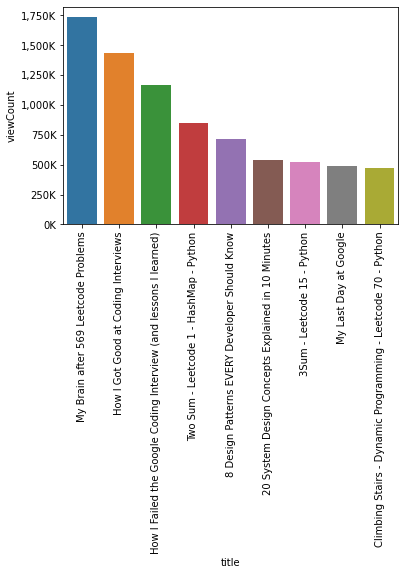

In [28]:
# Best performing videos

ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending=False)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))


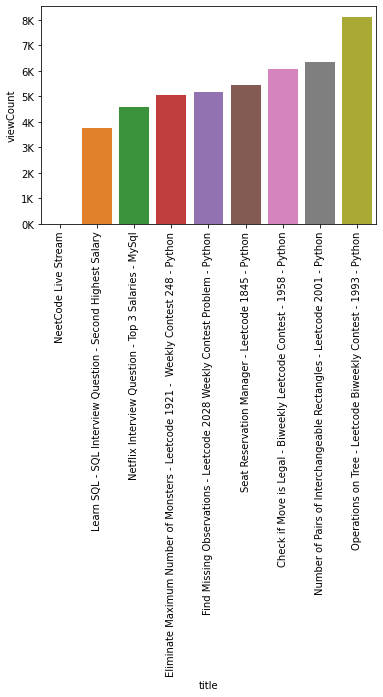

In [29]:
# Worst performing videos

ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending=True)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

/Users/yasaswiavula/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='channelTitle', ylabel='viewCount'>

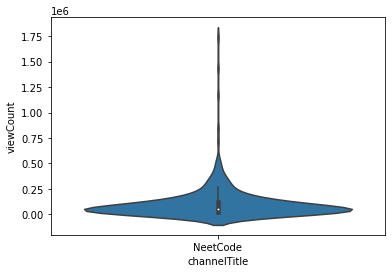

In [30]:
# View Distribution per video
sns.violinplot(video_df['channelTitle'], video_df['viewCount'])

<AxesSubplot:xlabel='likeCount', ylabel='viewCount'>

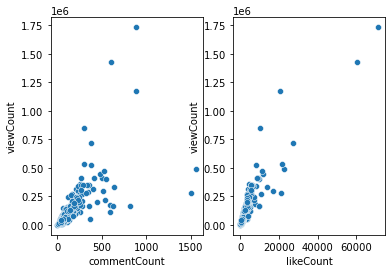

In [31]:
# Views vs. likes and comments
fig, ax = plt.subplots(1,2)
sns.scatterplot(data = video_df, x = 'commentCount', y = 'viewCount', ax = ax[0])
sns.scatterplot(data = video_df, x = 'likeCount', y = 'viewCount', ax = ax[1])

<AxesSubplot:xlabel='durationSecs', ylabel='Count'>

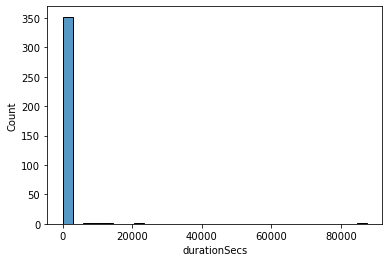

In [32]:
# Video duration
sns.histplot(data = video_df, x = 'durationSecs', bins=30)

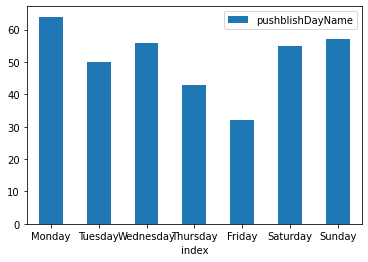

In [33]:
# Upload schedule
day_df = pd.DataFrame(video_df['pushblishDayName'].value_counts())
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df = day_df.reindex(weekdays)
ax = day_df.reset_index().plot.bar(x='index', y='pushblishDayName', rot=0)

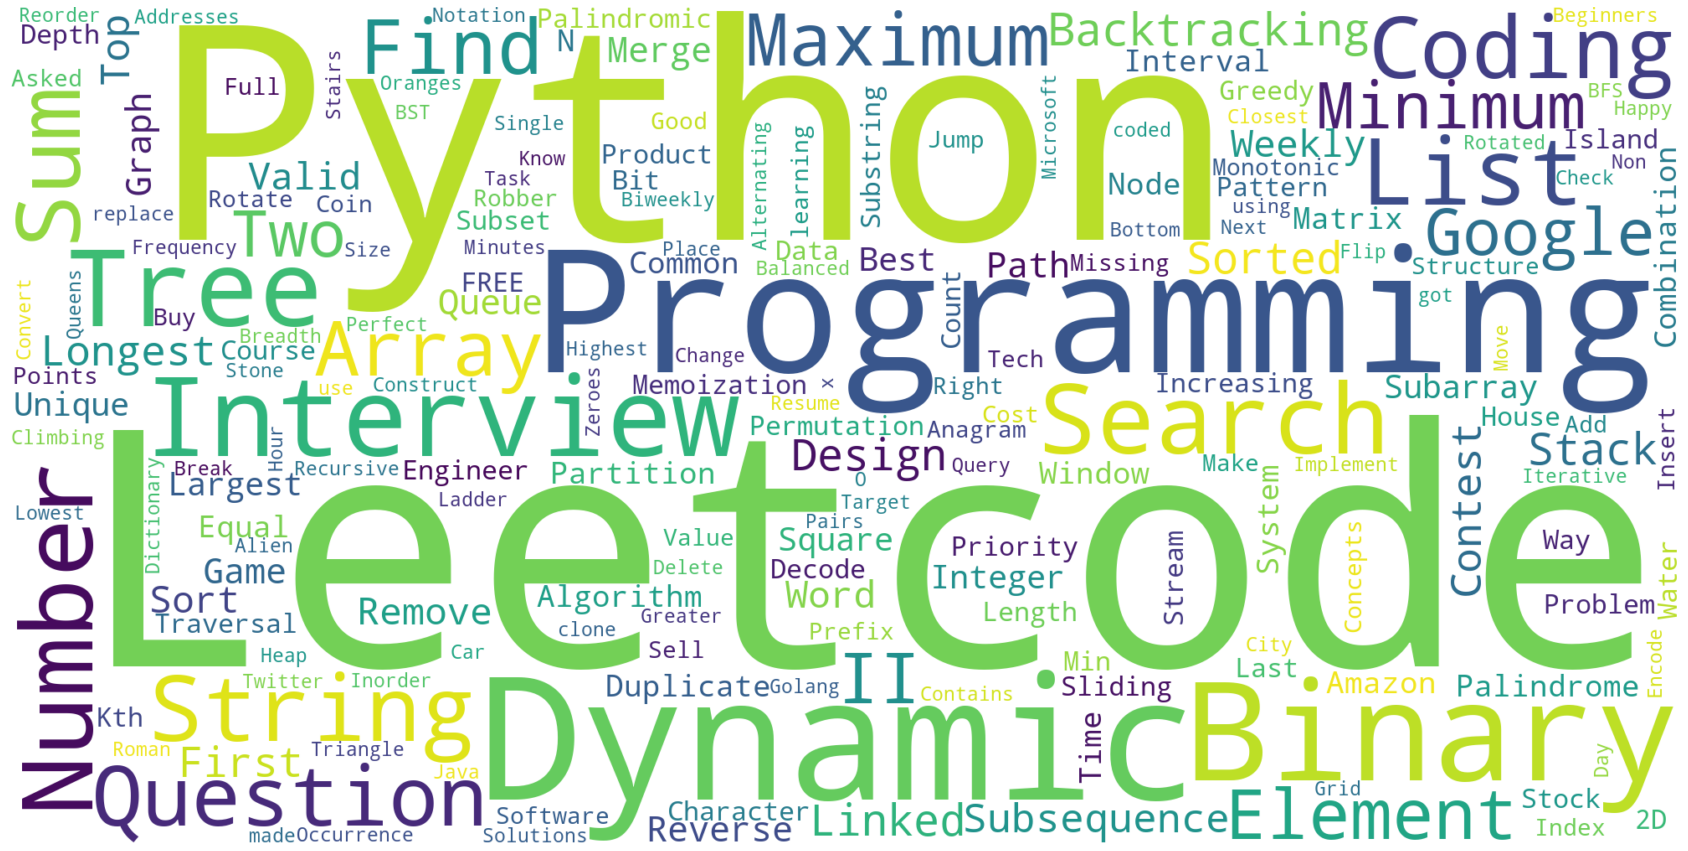

In [39]:
# Wordcloud for video titles
stop_words = set(stopwords.words('english'))
video_df['title_no_stopwords'] = video_df['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in video_df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 

# Generate WordCloud without specifying a font
wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='white', 
                      colormap='viridis', collocations=False).generate(all_words_str)

# Display the generated image for title words
plt.figure(figsize=(30, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## save dataframes as csv for further analysis

In [40]:
video_df.to_csv("Youtube_video_analysis.csv")

In [41]:
comments_df.to_csv("Youtube_comments_analysis.csv")